In [1]:
from keras.models import Sequential
from keras.layers import Dense, Conv2D, AveragePooling2D, Flatten
from keras.utils import to_categorical
from keras.callbacks import Callback

Using TensorFlow backend.


In [2]:
%matplotlib inline

In [3]:
#load mnist dataset
import numpy as np
mnist_train = np.genfromtxt('./MNIST/mnist_train.csv' ,delimiter=',')
mnist_test = np.genfromtxt('./MNIST/mnist_test.csv', delimiter=',')

In [4]:
mnist_train_labels = mnist_train[:,0]
mnist_train = mnist_train[:,1:]
mnist_test_labels = mnist_test[:,0]
mnist_test = mnist_test[:,1:]

In [5]:
num_classes = np.unique(mnist_train_labels).size
num_epoch = 3

In [6]:
import matplotlib.pyplot as plt

In [7]:
x = mnist_train[0:10,:]
xr = x.reshape(10,28,28)

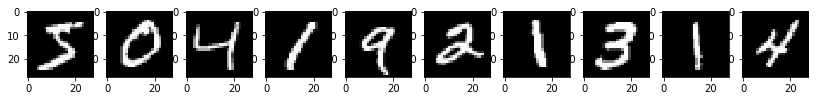

In [8]:
imlist = []
for item in np.arange(0,10):
    imlist.append(xr[item,:,:])
fig=plt.figure(figsize=(14, 28))
for image in np.arange(0,10):
    fig.add_subplot(10,10,image+1)
    plt.gray()
    plt.imshow(imlist[image])

In [9]:
mnist_train = mnist_train.reshape(mnist_train.shape[0], 28, 28, 1)
mnist_test = mnist_test.reshape(mnist_test.shape[0], 28, 28, 1)


In [10]:
#normalize grayscale values and get categorical labels
mnist_train /= 255
mnist_test /= 255
mnist_test_labels.astype(int)
mnist_train_labels.astype(int)


array([5, 0, 4, ..., 5, 6, 8])

In [11]:
model = Sequential()
model.add(Conv2D(6, kernel_size=(5,5), activation='tanh', input_shape=(28,28,1)))
model.add(AveragePooling2D(pool_size=(2,2)))
model.add(Conv2D(16, kernel_size=(5,5), activation='tanh'))
model.add(AveragePooling2D(pool_size=(2,2)))
model.add(Conv2D(60, kernel_size=(4,4), activation='tanh'))
model.add(Flatten())
model.add(Dense(128, activation='tanh'))
model.add(Dense(num_classes, activation='softmax'))

In [12]:
model.compile(loss='sparse_categorical_crossentropy',
              optimizer='adadelta',
              metrics=['accuracy'])

In [13]:
class LossHistory(Callback):
    def on_train_begin(self, logs={}):
        self.losses = []
        self.acchist = []

    def on_batch_end(self, batch, logs={}):
        self.losses.append(logs.get('loss'))
        self.acchist.append(logs.get('acc'))

In [14]:
history = LossHistory()
model.fit(mnist_train, mnist_train_labels, epochs=num_epoch, validation_split=0.2,
                          batch_size=100, callbacks=[history])

Train on 48000 samples, validate on 12000 samples
Epoch 1/3
48000/48000 [==============================] - 21s 439us/step - loss: 0.3373 - acc: 0.9003 - val_loss: 0.1731 - val_acc: 0.9458
Epoch 2/3
48000/48000 [==============================] - 21s 437us/step - loss: 0.1322 - acc: 0.9591 - val_loss: 0.1017 - val_acc: 0.9683
Epoch 3/3
48000/48000 [==============================] - 21s 427us/step - loss: 0.0890 - acc: 0.9727 - val_loss: 0.0804 - val_acc: 0.9768


In [15]:
evaluation = model.evaluate(x=mnist_test, y=mnist_test_labels)

10000/10000 [==============================] - 3s 290us/step


In [16]:
print('Test loss is: {}, and test accuracy is: {}'.format(evaluation[0], evaluation[1]))

Test loss is: 0.0746141657827422, and test accuracy is: 0.9775


In [17]:
xr = np.arange(0,len(history.losses))

(0, 1)

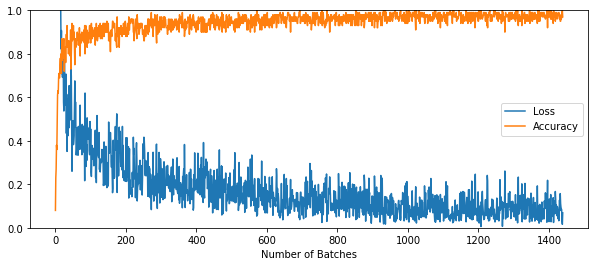

In [18]:
plt.figure(figsize=(10,4))
plt.plot(xr, history.losses)
plt.plot(xr, history.acchist)
plt.xlabel('Number of Batches')
plt.legend(['Loss', 'Accuracy'])
plt.ylim(0,1)

In [19]:
predictions = model.predict_classes(mnist_test)

In [20]:
predictions_tf = predictions == mnist_test_labels

In [21]:
predictions_tf

array([ True,  True,  True, ...,  True,  True,  True])

In [22]:
false_pred = []
for item in np.arange(0,len(predictions)):
    if predictions_tf[item] == False:
        false_pred.append(item)

In [23]:
len(false_pred)

225

Text(0.5,0,'Wrong prediction, predicted: 8, label: 9.0')

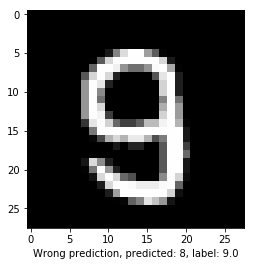

In [27]:
item = 0
plt.gray()
plt.imshow(mnist_test[false_pred[item],:,:,0])
plt.xlabel('Wrong prediction, predicted: {}, label: {}'.format(predictions[false_pred[item]],
                                                               mnist_test_labels[false_pred[item]]))